In [31]:
pip install pandas matplotlib vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import time

In [33]:
analyzer = SentimentIntensityAnalyzer()
df = pd.read_csv("social_media_sentiment_50.csv",delimiter=",")
df.head()

,id,platform,username,post_text,timestamp,sentiment
0,1,Twitter,user1,Waiting to see what happens next.,2025-10-16 09:02,Neutral
1,2,Instagram,user2,Completely disappointed with the results.,2025-10-16 09:04,Negative
2,3,Instagram,user3,Worst update ever.,2025-10-16 09:06,Negative
3,4,Instagram,user4,Great experience using this app!,2025-10-16 09:08,Positive
4,5,Twitter,user5,This product doesn’t work.,2025-10-16 09:10,Negative


In [34]:
def get_sentiment(text):
    score = analyzer.polarity_scores(str(text))["compound"]
    if score > 0.05:
        return "Positive"
    elif score < -0.05:
        return "Negative"
    else:
        return "Neutral"

In [35]:
# Add a column (recalculated sentiment)
df["Calculated_Sentiment"] = df["post_text"].apply(get_sentiment)
df.head()

,id,platform,username,post_text,timestamp,sentiment,Calculated_Sentiment
0,1,Twitter,user1,Waiting to see what happens next.,2025-10-16 09:02,Neutral,Neutral
1,2,Instagram,user2,Completely disappointed with the results.,2025-10-16 09:04,Negative,Negative
2,3,Instagram,user3,Worst update ever.,2025-10-16 09:06,Negative,Negative
3,4,Instagram,user4,Great experience using this app!,2025-10-16 09:08,Positive,Positive
4,5,Twitter,user5,This product doesn’t work.,2025-10-16 09:10,Negative,Neutral


🔄 Starting Real-Time Sentiment Visualization... (Press Ctrl+C to stop)


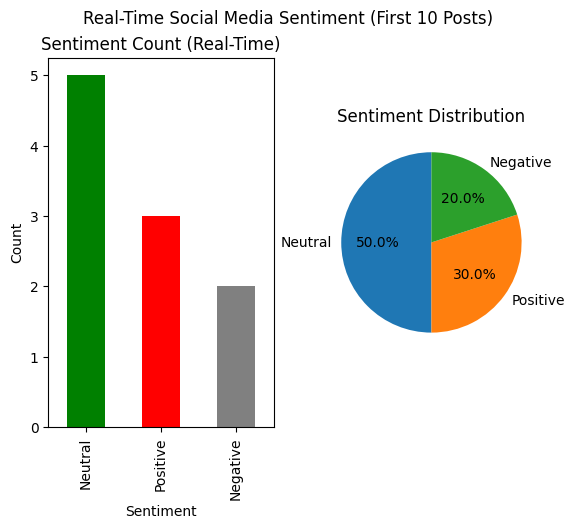

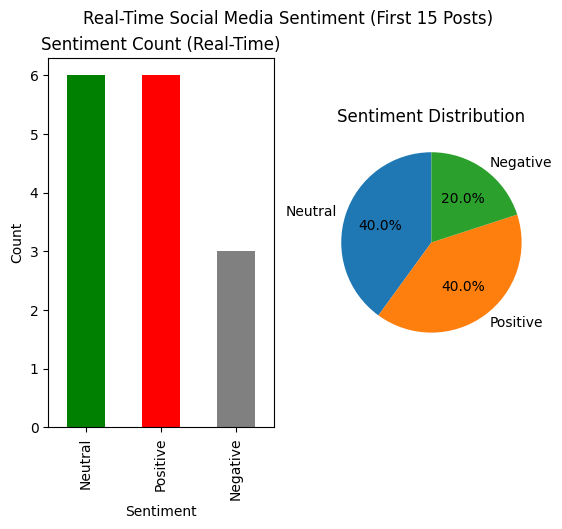

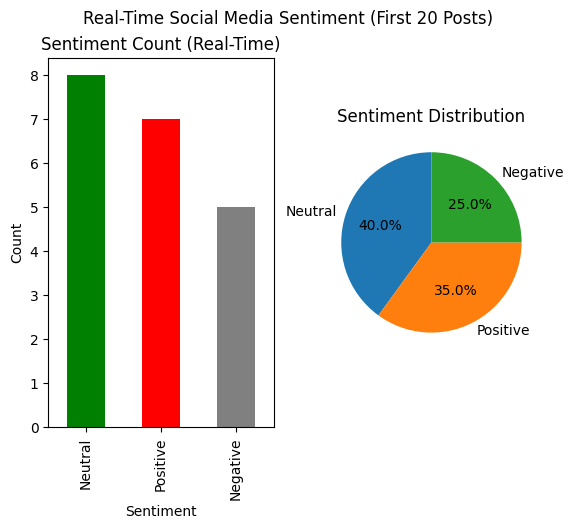

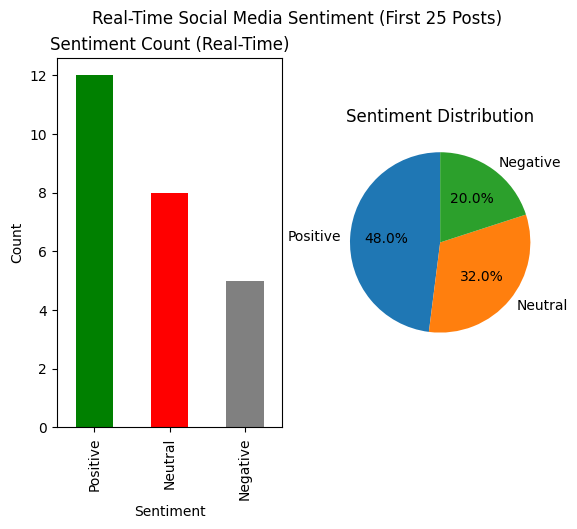

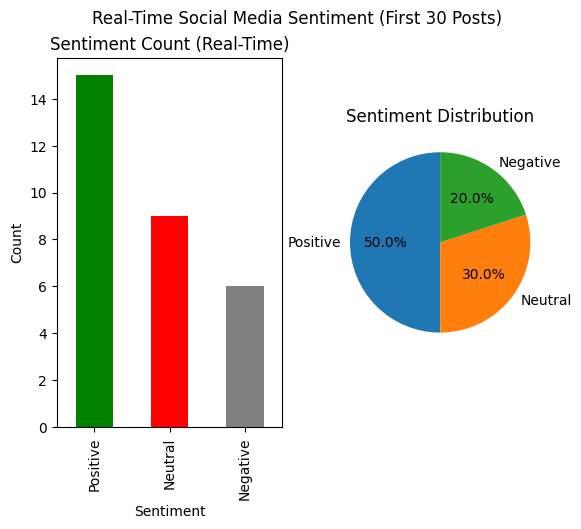

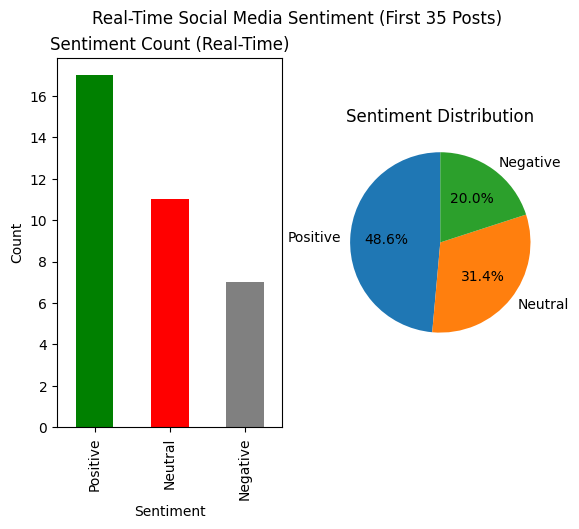

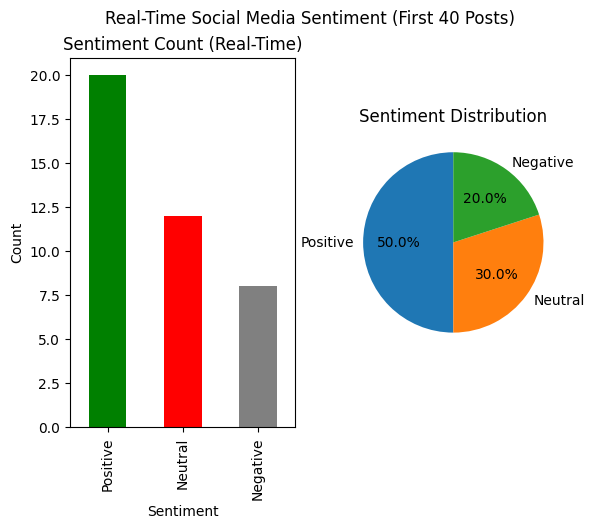

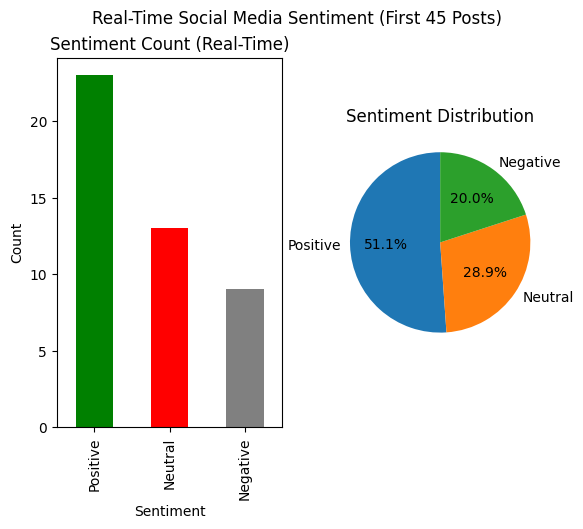

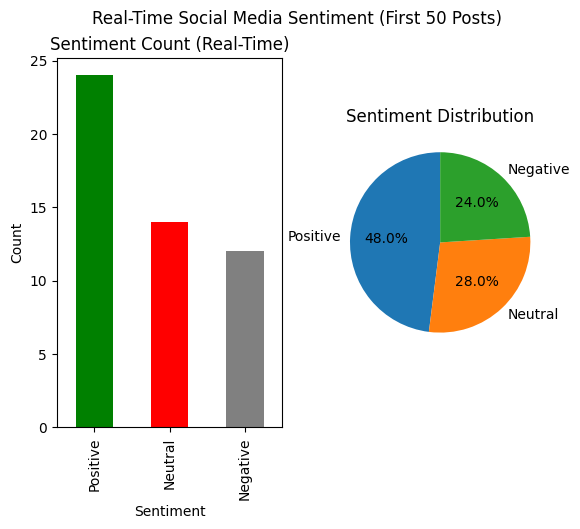

✅ Real-Time Visualization Completed!


In [36]:
print("🔄 Starting Real-Time Sentiment Visualization... (Press Ctrl+C to stop)")

plt.ion()  # Interactive mode on

for i in range(10, len(df) + 1, 5):  # Show in chunks of 5 posts
    subset = df.head(i)
    plt.clf()  # Clear previous figure

    # Count sentiments
    sentiment_counts = subset["Calculated_Sentiment"].value_counts()

    # --- Plot 1: Bar chart ---
    plt.subplot(1, 2, 1)
    sentiment_counts.plot(kind="bar", color=["green", "red", "gray"])
    plt.title("Sentiment Count (Real-Time)")
    plt.xlabel("Sentiment")
    plt.ylabel("Count")

    # --- Plot 2: Pie chart ---
    plt.subplot(1, 2, 2)
    plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title("Sentiment Distribution")

    plt.suptitle(f"Real-Time Social Media Sentiment (First {i} Posts)")
    plt.pause(2)  # Wait 2 seconds before next update

plt.ioff()
plt.show()
print("✅ Real-Time Visualization Completed!")
